In [32]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
import seaborn as sns
pd.options.mode.chained_assignment = None

<br><p style="font-family: Arial; font-size:3.75em;color:red; font-style:bold">
🚗 🚙 🚘 Sales Data Set</p><br><br>

For this Jupyter Notebook, we will be using  car dataset dataset from Kaggle. For more details about the dataset, 
please click on the link below:
- https://www.kaggle.com/gagandeep16/car-sales

In [33]:
# Load the dataset into the variable data
data = pd.read_csv("../data/raw/car/cars.csv")

In [34]:
# Inspect the dataset
data.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


<br><p style="font-family: Arial; font-size:3.75em;color:red; font-style:bold">
Data Visualization: One Variable</p><br><br>
    In the following, we will talk about graphs representing only one variable,
therefore we will chose only one column representing categorical variable and one column representing numerical variable.
 The columns are the following:
    
- Categorical variable :  Manufacturer
- Numerical variable   : Sales in thousands

<br><p style="font-family: Arial; font-size:3.75em;color:blue; font-style:bold">
1 - Categorical Variable </p><br><br>

In [35]:
# How many brands do we have in our dataset ?
brands = data['Manufacturer'].unique().tolist()
len(brands)

30

<br><p style="font-family: Arial; font-size:3.75em;color:blue; font-style:bold">
A - Frequency Distribution Table </p><br><br>



In [36]:
data['Manufacturer'].value_counts()

Ford             11
Dodge            11
Chevrolet         9
Toyota            9
Mercedes-Benz     9
Mitsubishi        7
Chrysler          7
Nissan            7
Lexus             6
Volkswagen        6
Oldsmobile        6
Pontiac           6
Volvo             6
Mercury           6
Cadillac          5
Saturn            5
Honda             5
Plymouth          4
Buick             4
Acura             4
Hyundai           3
Porsche           3
BMW               3
Lincoln           3
Audi              3
Jeep              3
Saab              2
Subaru            2
Infiniti          1
Jaguar            1
Name: Manufacturer, dtype: int64

### The above output shows the number of units sold by brand.

### For the ease of our analysis, we will consider only brand 🚙 🚗 🚘  that were sold out more than 6 times

In [37]:
df = data[data['Manufacturer'].map(data['Manufacturer'].value_counts()) > 6]

In [38]:
# How many brands do we have now?
len(df['Manufacturer'].unique().tolist())

8

<br><p style="font-family: Arial; font-size:3.75em;color:blue; font-style:bold">
B - Bar Chart </p><br><br>

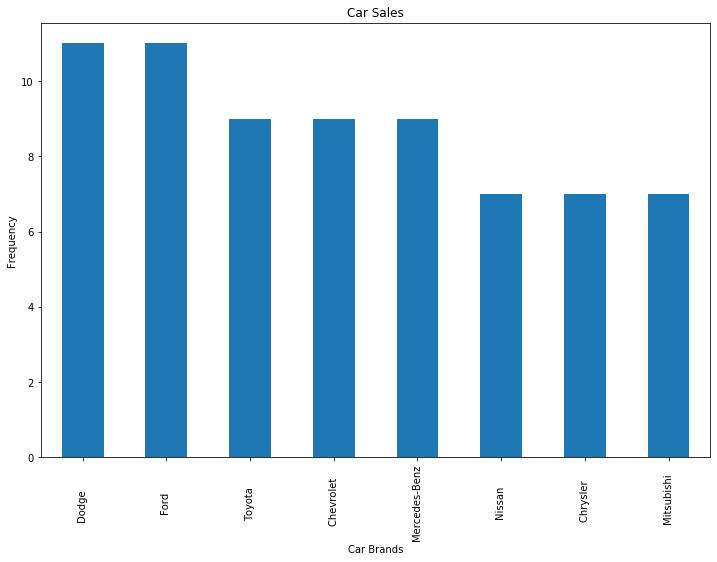

In [39]:
plt.figure(figsize=(12, 8))
ax = df['Manufacturer'].value_counts().plot(kind='bar')
ax.set_title('Car Sales')
ax.set_xlabel('Car Brands')
ax.set_ylabel('Frequency');

#### Observation: From the above graph, we can clearly see that Ford and Dodge are the most selling brands.

<br><p style="font-family: Arial; font-size:3.75em;color:blue; font-style:bold">
C - Pie Chart </p><br><br>
Let us represent the same data as market share by using the Pie chart. Here, the goal will not only to compare car brands among each other but also see their chare of the total.

In [40]:
total_sale_by_brand = df.groupby('Manufacturer',as_index=False)['Sales in thousands'].agg('sum')

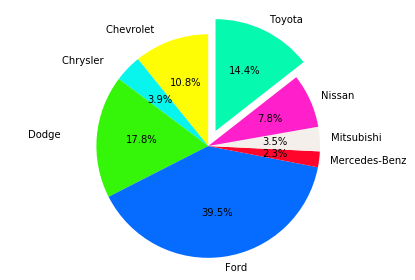

In [41]:
# Create a list of colors to use in the graph
colors = ["#fffd05", "#08f5ee", "#35f508", "#056cff", "#ff052c", "#f5efeb", "#ff1fcb", "#05fab0"]

# Create a pie chart
plt.pie(
    # using data Sales in thousands
    total_sale_by_brand['Sales in thousands'],
    # with the labels being Manufacturer
    labels=total_sale_by_brand['Manufacturer'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

<br><p style="font-family: Arial; font-size:3.75em;color:blue; font-style:bold">
D - Pareto Diagram </p><br><br>
A Pareto diagram is a special type of bar chart, where categories are shown in descending order of frequency.
- Frequency means here the number of occurrence of each brand car

In [42]:
total_sale_by_brand.set_index('Manufacturer', inplace=True)

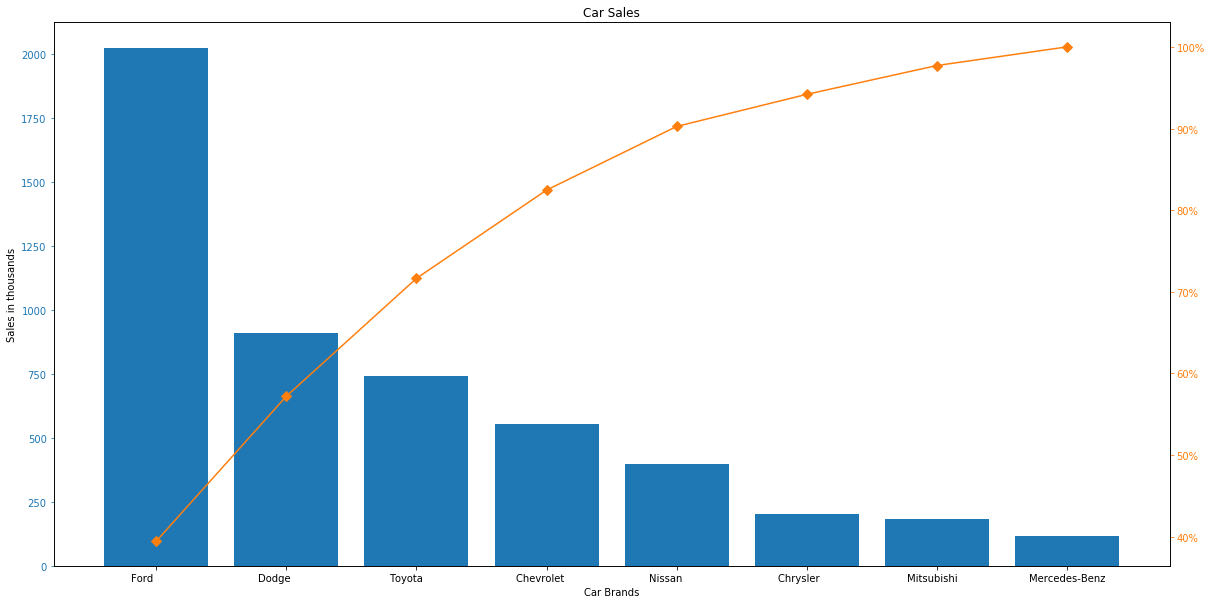

In [43]:
new_df = total_sale_by_brand.sort_values(by='Sales in thousands',ascending=False)
new_df["cumpercentage"] = new_df["Sales in thousands"].cumsum()/new_df["Sales in thousands"].sum()*100


fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(new_df.index, new_df["Sales in thousands"], color="C0")
ax2 = ax.twinx()
ax2.plot(new_df.index, new_df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.set_title('Car Sales')
ax.set_xlabel('Car Brands')
ax.set_ylabel('Sales in thousands')
plt.show()

The organge graph is showing here the cumulative frequency which represents the sum of the relative frequencies. For instance. From the Pie chart, we have the following relative frequency per brand:

- Ford          : 39.5%
- Dodge         : 17.8%
- Toyota        : 14.4%
- Chevrolet.    : 10.8%
- Nissan.       : 7.8%
- Chrysler      : 3.9%
- Mitsubishi.   : 3.5%
- Mercedes-Benz : 17.8%

The Pareto diagram combines the strong sides of the bar and pie charts. Here we can see that Ford and Dodge more than 50% of the market share. 

<br><p style="font-family: Arial; font-size:3.75em;color:blue; font-style:bold">
2 - Numerical Variable </p><br><br>

As for categoricak variable data visualization, we chose a column in our data which will represent the numerical data we are going to work with: Sales in thousand.

<br><p style="font-family: Arial; font-size:3.75em;color:blue; font-style:bold">
2.1 - Histogram  </p><br><br>

The Histogram is the most common graph used to represent numerical data. The graph below shos a frequency histogram of Sale in thousand whereas the vertical axis shows the actual values of each sales in thousand in our dataset. 

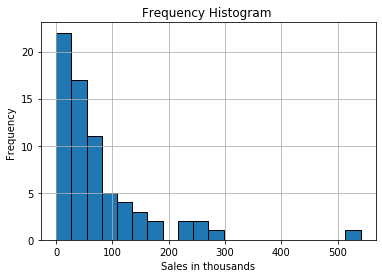

In [44]:
df['Sales in thousands'].hist(edgecolor='black', bins=20)
plt.title('Frequency Histogram ')
plt.xlabel('Sales in thousands')
plt.ylabel('Frequency ');

- NB: Sometimes it's useful to plot the intervals against the relative rather than the absolute frequency in order to compare each individual values to the overall totall of all sales concerned in our dataset.

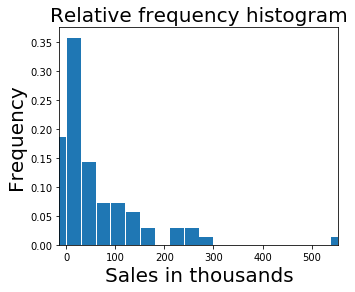

In [45]:
res = stats.relfreq(df['Sales in thousands'], numbins=20)
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, res.frequency, width=res.binsize)
ax.set_title('Relative frequency histogram', size=20)
ax.set_xlabel('Sales in thousands', size=20)
ax.set_ylabel('Frequency', size=20)
ax.set_xlim([x.min(), x.max()])
plt.show();


# Difference between relative frequency and frequency histogram:

Visually both types of histogram look the same but in fact, they give different information. In frequency histogram, each bar height corresponds to the frequency between the upper and lower bounds whereas in the relative frequency instead, each bar height corresponds to percentage of cases that are between the upper and lower bounds of the bar. 
For instance, if $N$ is the totale number of cases and $n$ is a frequency or absolute value, the relative frequency for a specific case $n$ will be computed as follow:  

$$\%n=\frac{n}{N}*100$$

The takeaway lesson here is that in frequency histogram, the y-axis is made up on frequencies or absolute values and in relative frequency instead, the y-axis is made on percentage representing the comparison of values to the overall total of all data point in our datset.

# Difference between bar chart and histogram:

It is also a good idea to differentiate a bar chart from an histogram. 
### 1- a bar chart is used to visualized categorical variables and the histogram is used to visualized numerical variables.
### 2- In the bar chart 📊, the x and y axes have different variable types: the y-axis has numerical data and x-axis has categorical data
### 3- In the histogram, both axes have numerical data.

<br><p style="font-family: Arial; font-size:3.75em;color:green; font-style:bold">
3 - Data Visualization: Two Variables</p><br><br>
In this part, we will be dealing with relationship between two variables. For that purpose, we will use different approach for categorical and numerical variables:

- For categorical variable, we will use the CROSS TABLES
- For numerical variable, we will use the SCATTER PLOTS.

In [46]:
df.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
19,Chevrolet,Cavalier,145.519,9.25,Passenger,13.26,2.2,115,104.1,67.9,180.9,2.676,14.3,27,17-Aug-15
20,Chevrolet,Malibu,135.126,11.225,Passenger,16.535,3.1,170,107,69.4,190.4,3.051,15,25,19-Mar-14
21,Chevrolet,Lumina,24.629,10.31,Passenger,18.89,3.1,175,107.5,72.5,200.9,3.33,16.6,25,24-May-15
22,Chevrolet,Monte Carlo,42.593,11.525,Passenger,19.39,3.4,180,110.5,72.7,197.9,3.34,17,27,22-Dec-15
23,Chevrolet,Camaro,26.402,13.025,Passenger,24.34,3.8,200,101.1,74.1,193.2,3.5,16.8,25,23-Oct-15


<br><p style="font-family: Arial; font-size:3.75em;color:green; font-style:bold">
3.1 Cross-Table</p><br><br>

For our cross table, we will use the columns Vehicle type as rownames and Manufacturer as colnames.

In [47]:
cross_table =pd.crosstab(df['Vehicle type'],
            df['Manufacturer'], 
           margins=True,
           margins_name="Total")

In [48]:
cross_table

Manufacturer,Chevrolet,Chrysler,Dodge,Ford,Mercedes-Benz,Mitsubishi,Nissan,Toyota,Total
Vehicle type,,,,,,,,,
Car,0,1,6,5,1,2,4,5,24
Passenger,9,6,5,6,8,5,3,4,46
Total,9,7,11,11,9,7,7,9,70


In [49]:
ct =pd.crosstab(df['Vehicle type'],
            df['Manufacturer'])

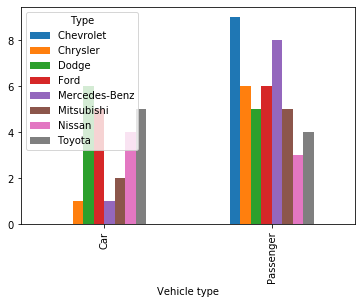

In [50]:
ct.plot.bar(stacked=False)
plt.legend(title='Type')

plt.show();

As we can see from the above cross_table dataframe, we have two types of vehicles:

- Car (🚘) 
- Passenger (🚙)

From the above the table, in the rows we have two distinct cars' type, and in the columns we each car brand. We included also the Total for each row and columns as it can be useful for further analysis.

NB: Subtotals of the rows give the total number of each vehicle type. On the other hands, the subtotals on the columns give us the total number of vehicles for each brand.

# Average Sales in thousands per vehicle type for each car brand

In [51]:
pd.crosstab(df['Vehicle type'],
            df['Manufacturer'], 
           values=df['Sales in thousands'],
           aggfunc=np.average,
           dropna=True)

Manufacturer,Chevrolet,Chrysler,Dodge,Ford,Mercedes-Benz,Mitsubishi,Nissan,Toyota
Vehicle type,,,,,,,,
Car,NaN,53.480000,111.541833,263.816600,28.976000,25.3425,47.261250,50.51160
Passenger,61.596111,24.706833,48.179600,117.258667,11.018625,26.0420,70.196667,121.91175


What we are observing from the above outputs, Ford is the brand with the highest Sales on average for the Car vehicle type while for Passenger vehicle type, the best seller on average is Toyota and Ford comming on the second place. From this output many information can be driven ...

<br><p style="font-family: Arial; font-size:3.75em;color:green; font-style:bold">
3.2 Side-by-side bar chart</p><br><br>
It represents the number of vehicles of each car brand for each vehicle type.

In [52]:
c_table =pd.crosstab(df['Vehicle type'],
            df['Manufacturer'])

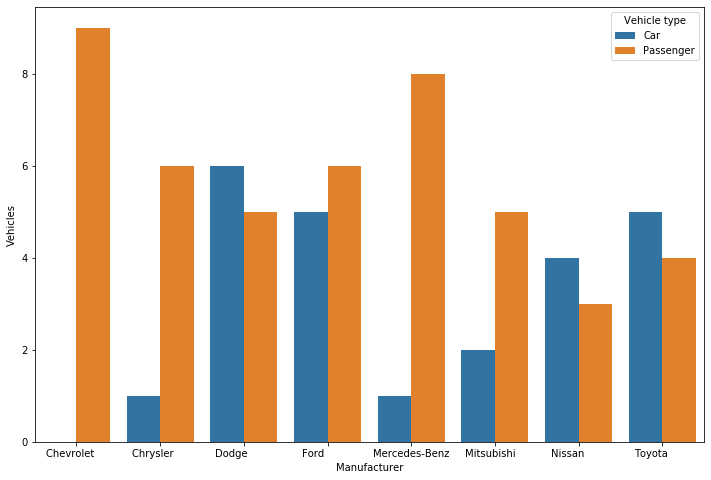

In [53]:
plt.figure(figsize=(12, 8))
stacked = c_table.stack().reset_index().rename(columns={0:'Vehicles'})
sns.barplot(x=stacked.Manufacturer, y=stacked.Vehicles, hue=stacked['Vehicle type']);

From this above graph, we can quicly compares vehickle type for each car brand or amaong cars' brand.

Takeaway lesson: All graphs are very easy to create and read, once we have identified the type of data we are dealing with.

<br><p style="font-family: Arial; font-size:3.75em;color:green; font-style:bold">
3.3 Scatter Plot</p><br><br>

It is used when we are representing two numerical variables

In [54]:
df = data[data['Manufacturer'].map(data['Manufacturer'].value_counts()) > 6]

In [55]:
#replacing blank * with ''
df.columns =[column.replace(" ", "_") for column in df.columns]

In [56]:
# 1- Reset the index and avoid the old index being added as a column
df = df.reset_index(drop=True)

In the row 141, we can see that the value of the column '4-year resale value' is equals to '.' therefore we can't directly cast the column to float otherwise we will get errors ...

In order to clean up our dataset, we will use the following steps:

- 1 : Reset the index
- 2 : Get the list of rows xhixh have . as value in 4-year resale value column
- 3 : Replace . by 0 into those rows
- 4 : Cast columns into int or float for those one that have object as dttypes

In [57]:
t = df[["4-year_resale_value", "Price_in_thousands"]]

In [58]:
t['4-year_resale_value'] = np.where(t['4-year_resale_value'] == '.', 'NaN', t['4-year_resale_value'])
t['Price_in_thousands'] = np.where(t['Price_in_thousands'] == '.', 'NaN', t['Price_in_thousands'])
t['4-year_resale_value']=t['4-year_resale_value'].astype(str).astype(float)
t['Price_in_thousands']=t['Price_in_thousands'].astype(str).astype(float)
t.dtypes
t.dropna().head(5)

,4-year_resale_value,Price_in_thousands
0,9.250,13.260
1,11.225,16.535
2,10.310,18.890
3,11.525,19.390
4,13.025,24.340


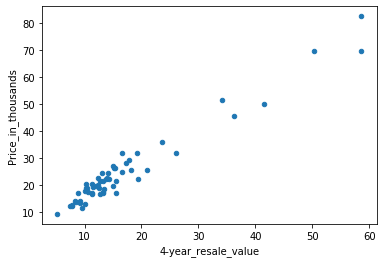

In [59]:
t.plot.scatter(x='4-year_resale_value', y='Price_in_thousands');

- 1 The resalue values range from 5.16 to 58.6, that is why our data is bounded within that range
- 2 Theyre are 70 cars, and the results consit of specific car in the dataset. Each point gives us information about a particular car's sale.
- We can see that there is an obvious uptrend. This is because lower resale values usually have lower price and hight resale values' price is high.

# Next : Statistics Part 2✌🏾😉
